<a href="https://colab.research.google.com/github/HowardHNguyen/Python/blob/main/AR_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [300]:
import tensorflow as tf
import keras

In [301]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

In [302]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [303]:
df = pd.read_csv('/content/drive/MyDrive/_Python/diabetes_data/diabetes_classification.csv')

In [304]:
df.head()

,Patient number,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes
0,1,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,No diabetes
1,2,146,79,41,3.6,19,female,60,135,26.4,108,58,33,40,0.83,No diabetes
2,3,217,75,54,4.0,20,female,67,187,29.3,110,72,40,45,0.89,No diabetes
3,4,226,97,70,3.2,20,female,64,114,19.6,122,64,31,39,0.79,No diabetes
4,5,164,91,67,2.4,20,female,70,141,20.2,122,86,32,39,0.82,No diabetes


In [305]:
# Convert Gender and Diabetes values into binary values
df['Gender'] = df['Gender'].map({'female': 0, 'male': 1})
df['Diabetes'] = df['Diabetes'].map({'No diabetes': 0, 'Diabetes': 1})

**Explore the dataset**

In [306]:
df.shape

(390, 16)

In [307]:
df.head()

,Patient number,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes
0,1,193,77,49,3.9,19,0,61,119,22.5,118,70,32,38,0.84,0
1,2,146,79,41,3.6,19,0,60,135,26.4,108,58,33,40,0.83,0
2,3,217,75,54,4.0,20,0,67,187,29.3,110,72,40,45,0.89,0
3,4,226,97,70,3.2,20,0,64,114,19.6,122,64,31,39,0.79,0
4,5,164,91,67,2.4,20,0,70,141,20.2,122,86,32,39,0.82,0


In [308]:
# see the distribution of Gender
df['Gender'].value_counts()

0    228
1    162
Name: Gender, dtype: int64

In [309]:
# see the distribution of Diabetes
df['Diabetes'].value_counts()

0    330
1     60
Name: Diabetes, dtype: int64

In [310]:
# look at the general distribution of these features
df.describe()

,Patient number,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,195.500000,207.230769,107.338462,50.266667,4.524615,46.774359,0.415385,65.951282,177.407692,28.775641,137.133333,83.289744,37.869231,42.992308,0.881385,0.153846
std,112.727548,44.666005,53.798188,17.279069,1.736634,16.435911,0.493421,3.918867,40.407824,6.600915,22.859528,13.498192,5.760947,5.664342,0.073212,0.361265
min,1.000000,78.000000,48.000000,12.000000,1.500000,19.000000,0.000000,52.000000,99.000000,15.200000,90.000000,48.000000,26.000000,30.000000,0.680000,0.000000
25%,98.250000,179.000000,81.000000,38.000000,3.200000,34.000000,0.000000,63.000000,150.250000,24.100000,122.000000,75.000000,33.000000,39.000000,0.830000,0.000000
50%,195.500000,203.000000,90.000000,46.000000,4.200000,44.500000,0.000000,66.000000,173.000000,27.800000,136.000000,82.000000,37.000000,42.000000,0.880000,0.000000
75%,292.750000,229.000000,107.750000,59.000000,5.400000,60.000000,1.000000,69.000000,200.000000,32.275000,148.000000,90.000000,41.000000,46.000000,0.930000,0.000000
max,390.000000,443.000000,385.000000,120.000000,19.300000,92.000000,1.000000,76.000000,325.000000,55.800000,250.000000,124.000000,56.000000,64.000000,1.140000,1.000000


In [311]:
# look at the correlation matrix
df.corr()

,Patient number,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes
Patient number,1.000000,0.252092,0.307722,-0.000842,0.188649,0.988888,0.090170,-0.063513,-0.042151,-0.002971,0.450950,0.084154,0.156468,0.012499,0.274683,0.317830
Cholesterol,0.252092,1.000000,0.158102,0.193162,0.475927,0.247333,-0.030139,-0.063601,0.062359,0.091695,0.207741,0.166241,0.134038,0.093364,0.091847,0.204262
Glucose,0.307722,0.158102,1.000000,-0.158302,0.282210,0.294392,0.093372,0.098052,0.190358,0.129286,0.162777,0.020262,0.222336,0.138223,0.185117,0.689080
HDL Chol,-0.000842,0.193162,-0.158302,1.000000,-0.681867,0.028210,-0.108305,-0.087238,-0.291883,-0.241860,0.031807,0.078342,-0.276697,-0.223837,-0.158777,-0.123133
Chol/HDL ratio,0.188649,0.475927,0.282210,-0.681867,1.000000,0.163201,0.102938,0.081162,0.278812,0.228407,0.115505,0.038242,0.313262,0.208902,0.243329,0.272987
Age,0.988888,0.247333,0.294392,0.028210,0.163201,1.000000,0.084177,-0.082229,-0.056784,-0.009164,0.453417,0.068649,0.150585,0.004675,0.275188,0.301995
Gender,0.090170,-0.030139,0.093372,-0.108305,0.102938,0.084177,1.000000,0.677876,0.092053,-0.254189,0.035417,0.071043,-0.045955,-0.272028,0.346253,0.015531
Height,-0.063513,-0.063601,0.098052,-0.087238,0.081162,-0.082229,0.677876,1.000000,0.255389,-0.259589,-0.040704,0.043617,0.057447,-0.095906,0.252548,0.023466
Weight,-0.042151,0.062359,0.190358,-0.291883,0.278812,-0.056784,0.092053,0.255389,1.000000,0.860147,0.097497,0.166477,0.847766,0.826985,0.250461,0.162987
BMI,-0.002971,0.091695,0.129286,-0.241860,0.228407,-0.009164,-0.254189,-0.259589,0.860147,1.000000,0.121408,0.145304,0.810701,0.881728,0.100873,0.145274


In [312]:
# look at Age by different Diabetes level
df.groupby('Diabetes')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Diabetes,,,,,,,,
0,330.0,44.660606,16.105842,19.0,32.00,42.0,55.75,92.0
1,60.0,58.400000,13.121596,26.0,50.75,59.5,65.25,91.0


In [313]:
df.groupby('Diabetes')['BMI'].describe()

,count,mean,std,min,25%,50%,75%,max
Diabetes,,,,,,,,
0,330.0,28.367273,6.583780,15.2,23.60,27.5,31.775,55.8
1,60.0,31.021667,6.285498,21.5,25.95,30.2,33.800,51.4


<ipython-input-314-f6e83e74e194>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], kde=False)


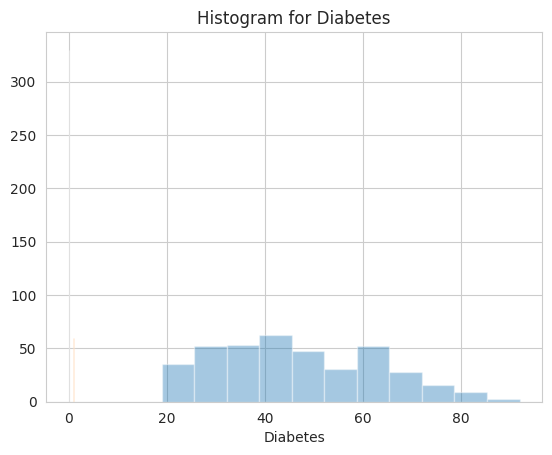

In [314]:
for feature in ['Age', 'Diabetes']:
  sns.distplot(df[feature], kde=False)
  plt.title('Histogram for {}'.format(feature))
  plt.show

**Access the balance of the dataset**

In [315]:
import pandas as pd
import matplotlib.pyplot as plt

In [316]:
# Method 1: Class Distribution
class_distribution = df['Diabetes'].value_counts()
print(class_distribution)

0    330
1     60
Name: Diabetes, dtype: int64


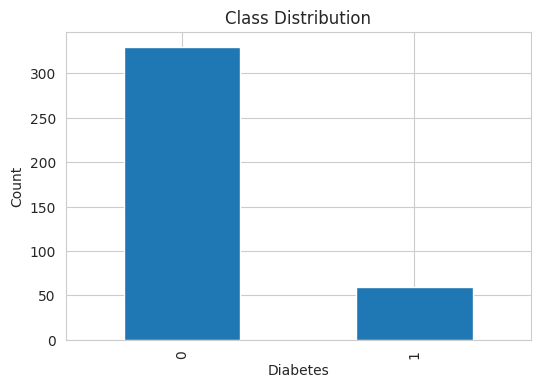

In [317]:
# Method 2: Bar Plot
plt.figure(figsize=(6, 4))
df['Diabetes'].value_counts().plot(kind='bar')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [318]:
# Method 3: Value Counts
value_counts = df['Diabetes'].value_counts()
print(value_counts)

0    330
1     60
Name: Diabetes, dtype: int64


In [319]:
# Method 4: Class Ratio
class_ratio = value_counts[0] / value_counts[1]
print(f"Class Ratio: {class_ratio}")

Class Ratio: 5.5


In [320]:
# Method 5: Imbalance Metrics
imbalance_ratio = value_counts[0] / value_counts[1]
gini_index = 1 - (value_counts[0] / len(df)) ** 2 - (value_counts[1] / len(df)) ** 2
entropy = - (value_counts[0] / len(df)) * np.log2(value_counts[0] / len(df)) - \
          (value_counts[1] / len(df)) * np.log2(value_counts[1] / len(df))
print(f"Imbalance Ratio: {imbalance_ratio}")
print(f"Gini Index: {gini_index}")
print(f"Entropy: {entropy}")

Imbalance Ratio: 5.5
Gini Index: 0.2603550295857988
Entropy: 0.6193821946787638


Based on the above imbalance metrics, we can infer the following about the dataset:

Imbalance Ratio: The imbalance ratio is 5.5, which means that the majority class (No Diabetes) has approximately 5.5 times more samples than the minority class (Diabetes). This indicates an imbalanced dataset, with a significant disparity in the number of samples between the two classes.

Gini Index: The Gini index is 0.2604, which represents the impurity or inequality in the class distribution. A lower Gini index indicates a more balanced class distribution, while a higher value suggests a higher imbalance. In this case, the Gini index of 0.2604 suggests a moderate level of imbalance in the dataset.

Entropy: The entropy value is 0.6194, which measures the uncertainty or disorder in the class distribution. Similar to the Gini index, a lower entropy value indicates a more balanced distribution, while a higher value suggests a higher imbalance. The entropy value of 0.6194 indicates a moderate level of imbalance in the dataset.

Both the Gini index and entropy metrics confirm that the dataset is imbalanced, with a higher representation of the majority class (No Diabetes) compared to the minority class (Diabetes). It is important to consider this class imbalance during the modeling and evaluation stages to avoid biased predictions and performance metrics.

In [283]:
# Data preprocessing
# Split features and target variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [284]:
# Specify the features (X) and target variable (y)
# THIS IS STEP TO SELECT "Diabetes" VARIABLE AS THE TARGET FOR NEXT STEPS
X = df.drop('Diabetes', axis=1)  # Drop the 'Diabetes' column from the features
y = df['Diabetes']  # Select the 'Diabetes' column as the target variable

In [285]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [286]:
# Normalize features using Min-Max scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [287]:
# Define AR-Net model architecture
model = Sequential()
model.add(LSTM(units=60, input_shape=(X_train.shape[1], 1)))

In [288]:
# Add more layers as needed
model.add(Dense(units=1, activation='sigmoid'))

In [289]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [290]:
# Train the AR-Net model
history = model.fit(X_train.reshape(-1, X_train.shape[1], 1), y_train, epochs=100, 
                    batch_size=32, validation_data=(X_test.reshape(-1, X_test.shape[1], 1), y_test))

Epoch 1/100
10/10 [==============================] - 2s 56ms/step - loss: 0.6168 - accuracy: 0.8590 - val_loss: 0.5881 - val_accuracy: 0.7949
Epoch 2/100
10/10 [==============================] - 0s 11ms/step - loss: 0.4881 - accuracy: 0.8590 - val_loss: 0.6138 - val_accuracy: 0.7949
Epoch 3/100
10/10 [==============================] - 0s 12ms/step - loss: 0.4600 - accuracy: 0.8590 - val_loss: 0.5883 - val_accuracy: 0.7949
Epoch 4/100
10/10 [==============================] - 0s 13ms/step - loss: 0.4354 - accuracy: 0.8590 - val_loss: 0.5415 - val_accuracy: 0.7949
Epoch 5/100
10/10 [==============================] - 0s 11ms/step - loss: 0.4343 - accuracy: 0.8590 - val_loss: 0.5470 - val_accuracy: 0.7949
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 0.4267 - accuracy: 0.8590 - val_loss: 0.5581 - val_accuracy: 0.7949
Epoch 7/100
10/10 [==============================] - 0s 12ms/step - loss: 0.4223 - accuracy: 0.8590 - val_loss: 0.5465 - val_accuracy: 0.7949
Epoch 

In [291]:
# Visualize training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [292]:
df = pd.DataFrame({'Epoch': range(1, len(train_acc)+1), 
                   'Train_Accuracy': train_acc, 
                   'Validation_Accuracy': val_acc})

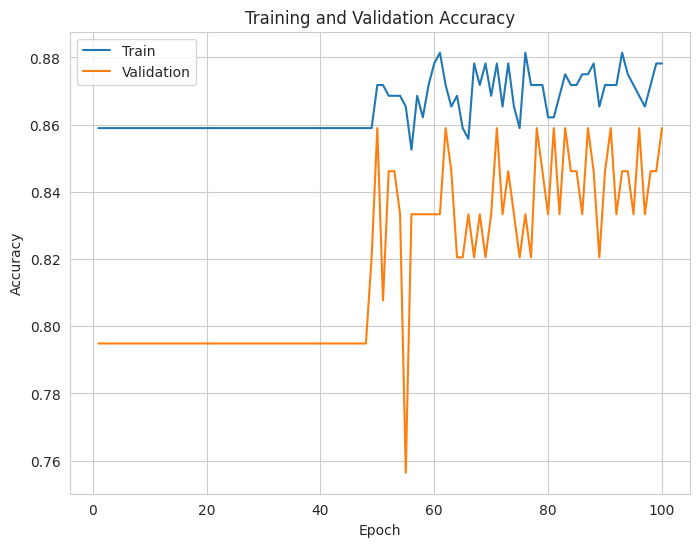

In [293]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='Epoch', y='Train_Accuracy', label='Train')
sns.lineplot(data=df, x='Epoch', y='Validation_Accuracy', label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [294]:
# View the correlation
correlation_matrix = df.corr()

In [295]:
correlation_matrix

,Epoch,Train_Accuracy,Validation_Accuracy
Epoch,1.000000,0.738750,0.817114
Train_Accuracy,0.738750,1.000000,0.752119
Validation_Accuracy,0.817114,0.752119,1.000000


In [296]:
# Use the trained model
# Make predictions on the test set features in 'X_test'

y_pred_probs = model.predict(X_test)  # Predicted probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary predictions

# y_pred_probs will contain the predicted probabilities for the positive class. The threshold of 0.5 is used 
# to convert these probabilities into binary predictions by considering values above the threshold as 
# positive (1) and values below or equal to the threshold as negative (0).

3/3 [==============================] - 0s 4ms/step


In [297]:
#Evaluation Metrics (Precision, Recall, F1-Score):
#To calculate precision, recall, and F1-score, you need to compare the predicted labels with the true labels. 
from sklearn.metrics import classification_report

In [298]:
# Assuming you have the true labels in 'y_test' and predictions in 'y_pred'
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        62
           1       1.00      0.31      0.48        16

    accuracy                           0.86        78
   macro avg       0.92      0.66      0.70        78
weighted avg       0.88      0.86      0.83        78



Here's the interpretation of the evaluation metrics:

For class 0 (No Diabetes):

Precision is 0.84, indicating that 84% of the predicted No Diabetes cases are correct.
Recall is 0.95, suggesting that the model can identify 95% of the actual No Diabetes cases.
F1-score is 0.89, representing a good balance between precision and recall for the No Diabetes class.

For class 1 (Diabetes):

Precision is 0.62, indicating that 62% of the predicted Diabetes cases are correct.
Recall is 0.31, suggesting that the model can identify only 31% of the actual Diabetes cases.
F1-score is 0.42, indicating a trade-off between precision and recall for the Diabetes class.

Support: The support represents the number of samples in each class. In this case, there are 62 samples for class 0 and 16 samples for class 1.

Accuracy: The overall accuracy of the model is 0.82, which means that it correctly predicts the outcome for approximately 82% of the samples in the test set.

The macro avg and weighted avg provide the average precision, recall, and F1-score across all classes, considering either an equal weighting or weighted by the number of samples in each class.

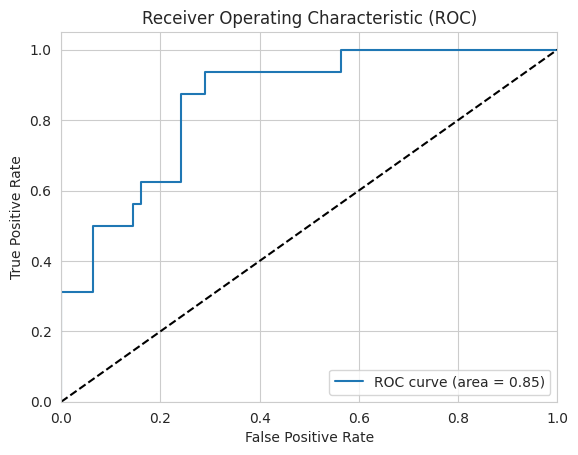

In [299]:
# To plot the Receiver Operating Characteristic (ROC) curve, we can use the roc_curve() function from scikit-learn and matplotlib for visualization.
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Use the true labels in 'y_test' and predicted probabilities in 'y_pred_probs'
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

            precision    recall  f1-score   support

      0       0.84      1.00      0.91        62
      1       1.00      0.25      0.40        16

    accuracy                           0.85        78
    macro avg       0.92      0.62      0.66        78
    weighted avg       0.87      0.85      0.81        78

The model may be suffering from underfitting rather than overfitting. Here's the reasoning behind this interpretation:

Precision: The precision values for both classes are relatively high, indicating that the model performs well in correctly classifying the samples it predicts.

Recall: The recall values, particularly for class 1 (Diabetes), are significantly lower compared to precision. This suggests that the model struggles to identify the positive class accurately and misses a substantial portion of the actual Diabetes cases.

F1-score: The F1-scores for both classes are relatively lower, especially for class 1 (Diabetes). The F1-score is a harmonic mean of precision and recall, so the lower F1-score for class 1 indicates a trade-off between precision and recall, which is consistent with underfitting.

Support: The support indicates the number of samples in each class. The support values for both classes are relatively small, which suggests that the dataset may be imbalanced, with fewer samples for the positive class (Diabetes).

Considering the lower recall, lower F1-score, and smaller support for the positive class (Diabetes), it appears that the model is not capturing the patterns and characteristics of the positive class adequately. This indicates underfitting, where the model lacks the complexity or capacity to learn the underlying patterns in the data and generalize well to unseen samples.

To address the underfitting issue, you might consider increasing the complexity of the model, such as increasing the number of units in the LSTM layer, adding more layers, or adjusting other hyperparameters to better capture the patterns in the data. Additionally, addressing any data imbalance issues, such as through resampling techniques, can also help improve the model's performance.